# **LAB 02: REGRESSION**

# Data Exploration

In [1]:
# IMPORT LIB
import pandas as pd
import numpy as np

In [2]:
# Import data
data_path = "https://raw.githubusercontent.com/kanedinh/datasets/main/Real%20estate%20valuation%20data%20set.csv"
df = pd.read_csv(data_path)

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Shape of data
print(df.shape[0], 'Records')
print(df.shape[1], 'Features')

414 Records
8 Features


In [4]:
# Describe
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
# Data type
print('Data types:') 
print(df.dtypes)

Data types:
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


In [6]:
# Check duplicate values
print('Duplicate values:', df.duplicated().sum())

Duplicate values: 0


In [7]:
# Check missing values
print('Missing values:')
print(df.isnull().sum())

Missing values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


# Data Preprocessing

In [8]:
# Drop column 'No'
df = df.drop('No', axis=1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

print(X.shape)
print(y.shape)

(414, 6)
(414,)


In [10]:
y = y.to_numpy()
y = y.reshape(-1, 1)

print("Features size: \t", X.shape)
print("Target size: \t", y.shape)

Features size: 	 (414, 6)
Target size: 	 (414, 1)


# Features Selection/Engineering

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

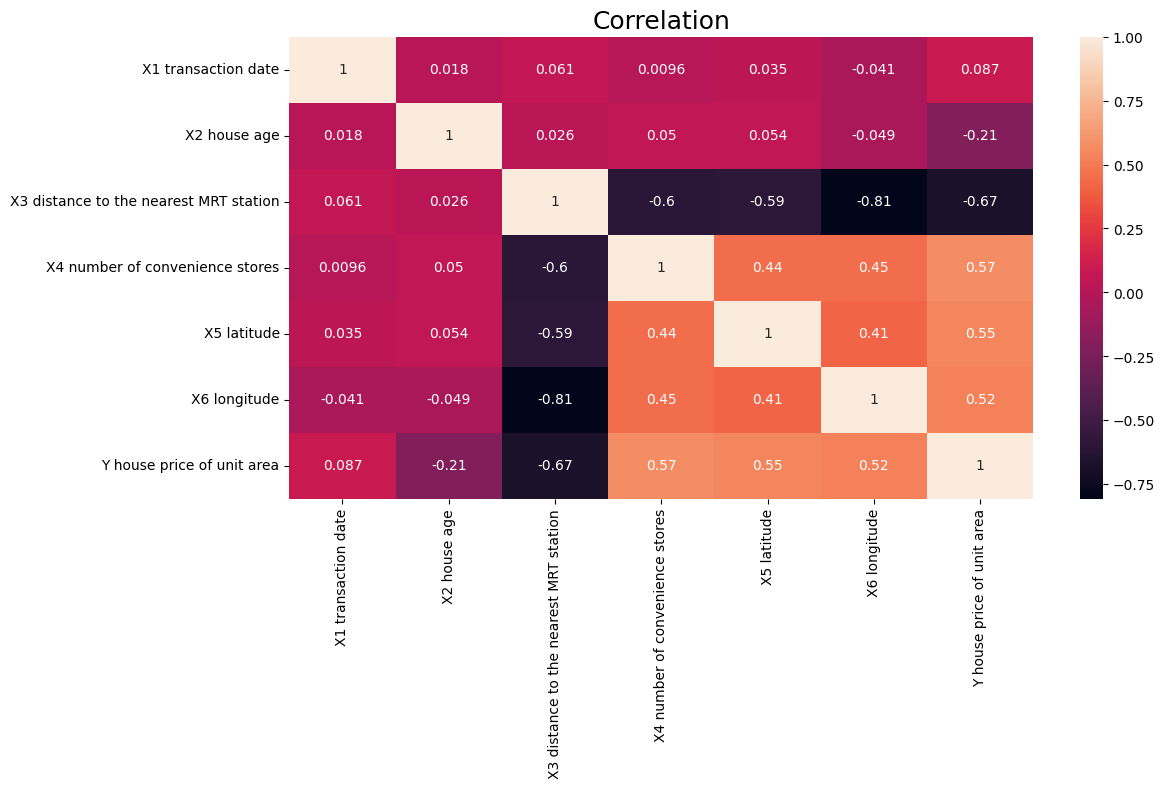

In [12]:
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr,annot= True)
plt.title("Correlation", fontsize=18)
plt.show()

Handle features are highly correlated.

In [13]:
def correlation(dataset, cor):
    df = dataset.copy()
    col_corr = set()  # For storing unique value
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > cor: # absolute values to handle positive and negative correlations
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(X, 0.8)    # X: features, threshold corr = 0.8
X = X.drop(corr_features, axis = 1)
df = df.drop(corr_features, axis = 1)
print(f"Columns has dropped: {corr_features}")

Columns has dropped: {'X6 longitude'}


Select relevant features that are highly correlated with the target variable

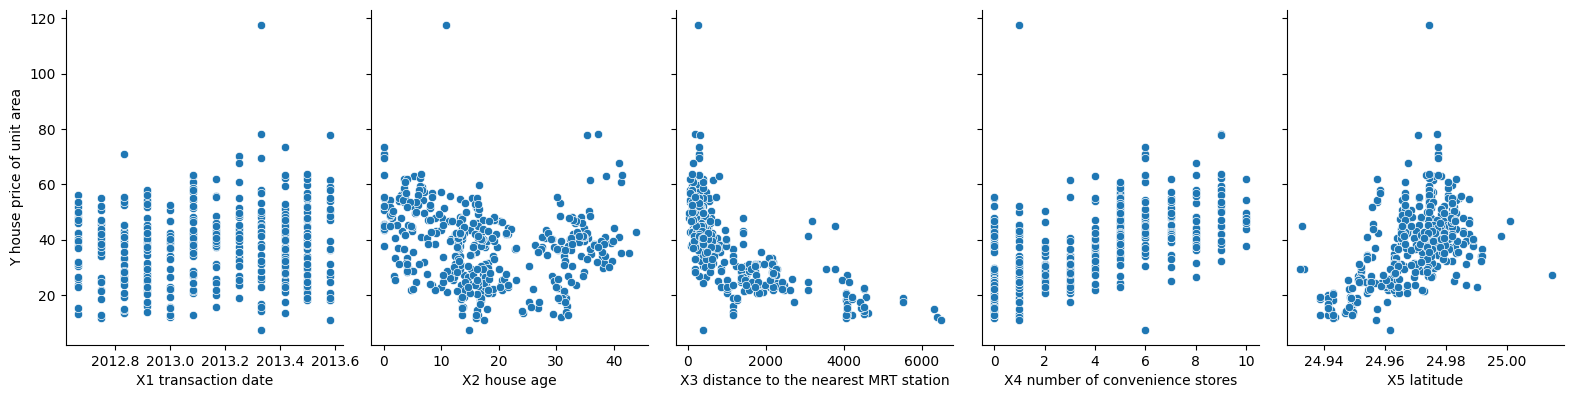

In [15]:
# plot X and Y scatterplot in a single plot
sns.pairplot(df, x_vars = X.columns, y_vars = ['Y house price of unit area'], height= 4, aspect= 0.8, kind= 'scatter')
plt.show()

In [16]:
corr_matrix = df.corr()
corr_matrix_target = corr_matrix['Y house price of unit area'][:-1]
print("Correlation between the independent variable and the dependent variable:")
print(corr_matrix_target)

Correlation between the independent variable and the dependent variable:
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
Name: Y house price of unit area, dtype: float64


In [17]:
# The feature will be drop if abs(corr) < 0.2
low_corr = corr_matrix_target[abs(corr_matrix_target) < 0.2]
low_corr = low_corr.index.values.tolist()
low_corr

['X1 transaction date']

In [18]:
# Drop the col are lowly correlated with the target variable
X = X.drop(low_corr, axis=1)
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude
0,32.0,84.87882,10,24.98298
1,19.5,306.59470,9,24.98034
2,13.3,561.98450,5,24.98746
3,13.3,561.98450,5,24.98746
4,5.0,390.56840,5,24.97937
...,...,...,...,...
409,13.7,4082.01500,0,24.94155
410,5.6,90.45606,9,24.97433
411,18.8,390.96960,7,24.97923
412,8.1,104.81010,5,24.96674


Normalize the numerical features after we have X

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize data
X = scaler.fit_transform(X)

print("Scaled X:\n", X)

Scaled X:
 [[ 1.25562833 -0.79249504  2.00740743  1.12542986]
 [ 0.15708622 -0.61661163  1.66750286  0.91244418]
 [-0.38779067 -0.41401527  0.30788458  1.48686011]
 ...
 [ 0.09556786 -0.54967846  0.98769372  0.82289338]
 [-0.84478419 -0.77668389  0.30788458 -0.18475479]
 [-0.98539758 -0.78807071  1.66750286  0.42757905]]


# Model Training And Evaluation

In [20]:
# Split 80% for train and 20% for test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_train: {y_test.shape}")

Training size: 	X_train: (331, 4) 	y_train: (331, 1)
Testing size: 	X_test: (83, 4) 	y_train: (83, 1)


In [21]:
# Training with fit_intercept = TRUE
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [23]:
# Print coeff and intercept
print("Coefficent of determination:",regressor.coef_)
print("Intercept:",regressor.intercept_)

Coefficent of determination: [[-3.49051331 -5.40813546  3.69123356  2.77726518]]
Intercept: [37.9551272]


In [24]:
# Show metrics evaluate the performance of model 
from sklearn import metrics

print("Train".center(50, '-'))
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))

print("Test".center(50, '-'))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

----------------------Train-----------------------
>> Train MSE:  83.73547843529111
>> Train MAE:  6.195866928884869
>> Train R2-Score:  0.5828011135200201
-----------------------Test-----------------------
>> Test MSE:  62.566873556325426
>> Test MAE:  6.150853411652518
>> Test R2-Score:  0.48201644410812816


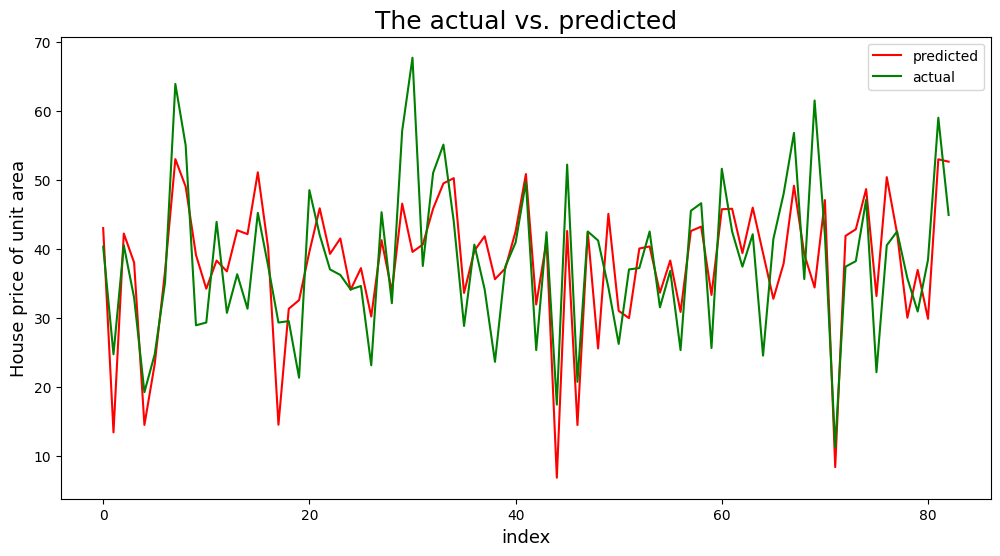

In [25]:
# Visualize the actual vs. predicted
plt.figure(figsize=(12,6))

plt.plot(test_pred, label ='predicted', color = 'red')
plt.plot(y_test, label ='actual', color = 'green')

plt.xlabel('index', fontsize=13)
plt.ylabel('House price of unit area', fontsize=13)
plt.title('The actual vs. predicted', fontsize=18)
plt.legend()
plt.show()

# Hyperparameter Tuning


Find best parameter

In [26]:
from sklearn.model_selection import GridSearchCV

# parameter of model
parameter = {
    'fit_intercept': [True, False],
}

In [27]:
hyperparameter = GridSearchCV(LinearRegression(), parameter, cv = 5)

In [28]:
hyperparameter.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [29]:
# Best parameter

best_parameters = hyperparameter.best_params_
print(best_parameters)

{'fit_intercept': True}


In [30]:
highest_accuracy = hyperparameter.best_score_
print(highest_accuracy)

0.5771477409383605


In [31]:
# Print result all parameters
result = pd.DataFrame(hyperparameter.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000812,0.000758,0.000302,0.000604,True,{'fit_intercept': True},0.686356,0.532089,0.666641,0.421530,0.579124,0.577148,0.096111,1
1,0.000899,0.000492,0.000409,0.000501,False,{'fit_intercept': False},-7.978257,-7.909655,-7.717303,-5.406862,-9.119314,-7.626278,1.213873,2


# Conclusion and Further Analysis


**Tóm tắt Kết quả đánh giá:**

In [32]:
print("Train".center(50, '-'))
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))

print("Test".center(50, '-'))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

----------------------Train-----------------------
>> Train MSE:  83.73547843529111
>> Train MAE:  6.195866928884869
>> Train R2-Score:  0.5828011135200201
-----------------------Test-----------------------
>> Test MSE:  62.566873556325426
>> Test MAE:  6.150853411652518
>> Test R2-Score:  0.48201644410812816


Model Linear Regression đạt được R-squared score và MSE ở mức khá ở cả tập train và test, cho thấy khả năng dự đoán tương đối khá cho mục tiêu cần dự đoán.

**Thảo luận về các hạn chế hoặc giả định trong mô hình Linear Regression:**

Model Linear Regression là mô hình giả định mối quan hệ tuyến tính giữa các biến, và sẽ không phù hợp với mối quan hệ phi tuyến tính giữa các biến trong tập dữ liệu . Hạn chế khác có thể bao gồm sự thiếu chuẩn xác trong dữ liệu (giá trị gây nhiễu và giá trị ngoại lai), overfitting hoặc underfitting.


**Đề xuất hướng đi để cải thiện mô hình:**

Mở rộng thêm dữ liệu: thu thập thêm dữ liệu để cải thiện độ chính xác.

Xử lý biến độc lập (X): Kiểm tra và xử lý các biến độc lập (X) để đảm bảo rằng chúng phản ánh mối quan hệ tuyến tính với biến phụ thuộc (Y).

Kiểm tra khả năng mô hình: sử dụng các phương pháp kiểm định thống kê để đánh giá mức độ phù hợp và hiệu suất của mô hình.